# Udacity SDC ND P4

### In this Notebook, images are read from the camera_cal directory by the program and undistorted using the computed camera distortion matrices. Then save the calibration data to be used by the main notebook.

### For more please check the writeup_report.md and README.md files in same repo.

In [2]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

import pickle as pickle

%matplotlib inline

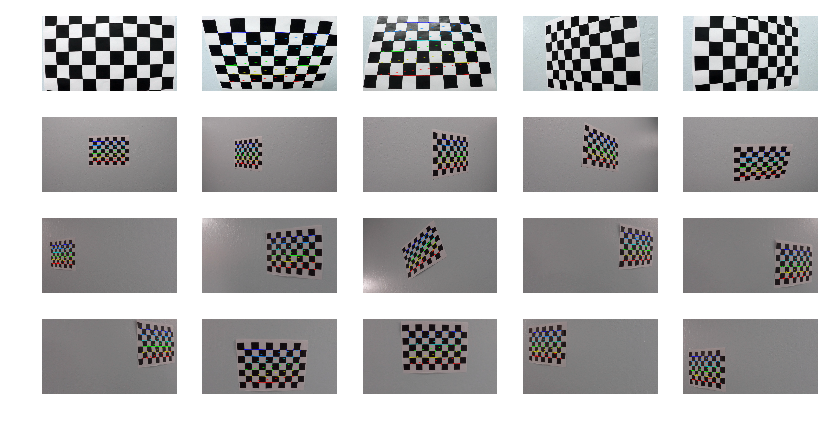

In [3]:
# Chessboard size
nx=9
ny=6

objpoints = [] # 3d real world space points
imgpoints = [] # 2d image points

objpoint = np.zeros((ny*nx,3), np.float32)
objpoint[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

plt.figure(figsize = (10,5))

# read images from the camera_cal directory
for i in range(20):
    
    img = cv2.imread('camera_cal/calibration'+ str(i+1) + '.jpg')
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # get chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        # Draw corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
        # Add object and reaal points
        objpoints.append(objpoint)
        imgpoints.append(corners)
        
        # Display 
        plt.subplot(4,5,i+1)
        plt.imshow(img)
    
    else:
        plt.subplot(4,5,i+1)
        plt.imshow(img)
    
    
    
    plt.axis('off')

### Example of calibration image with drawing corners

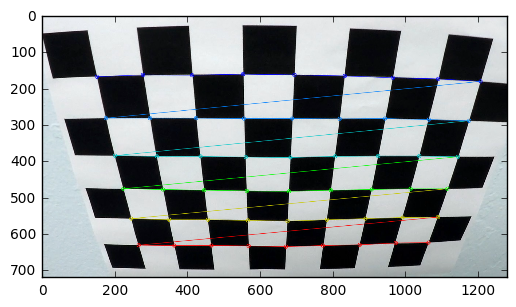

In [4]:
# Read Image
img = cv2.imread('camera_cal/calibration'+ str(2) + '.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# find corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# Draw chessboard corners
cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

# Display
plt.imshow(img)
plt.savefig("output_images/chess_image_with_corners.jpg")

### Calculate Camera Calibration and save parameters


In [5]:
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Save calibration data
calibr_data = [mtx,dist]
pickle.dump( calibr_data, open( "camera_calibration.pkl", "wb" ) ) 

### Undistort and display images

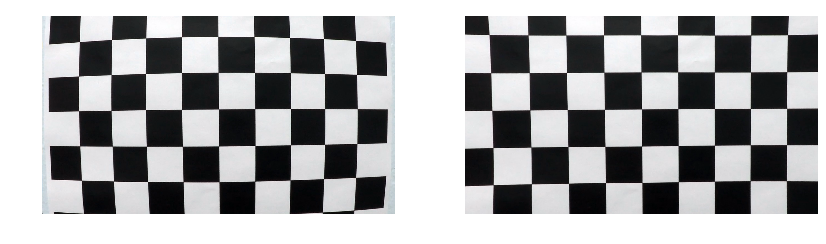

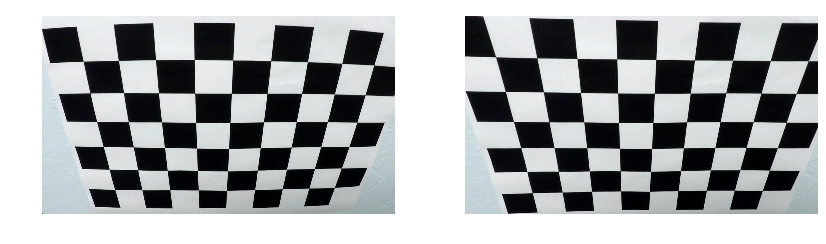

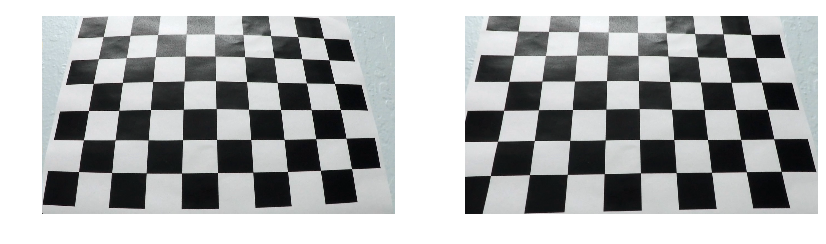

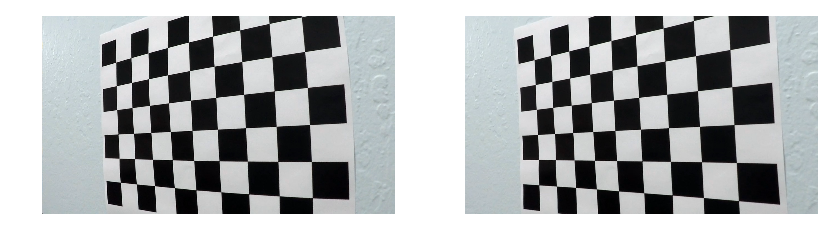

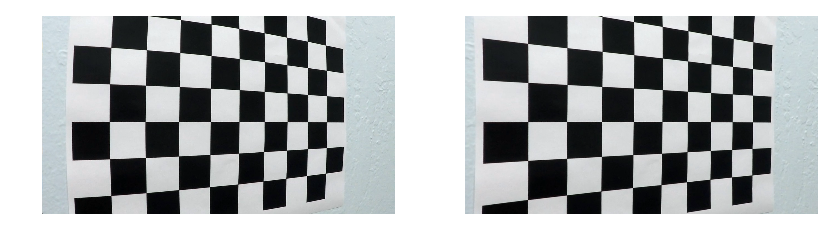

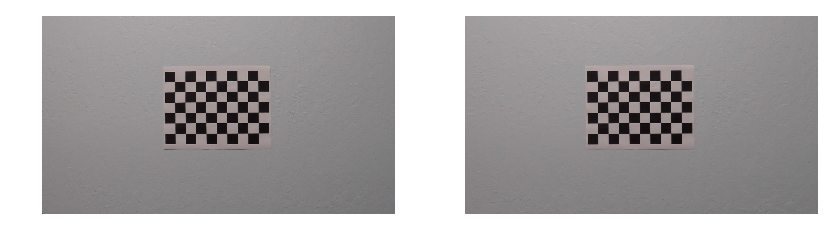

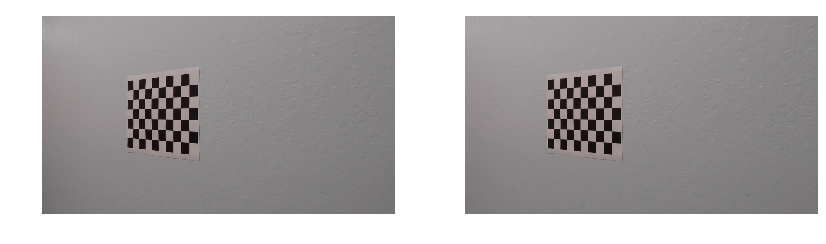

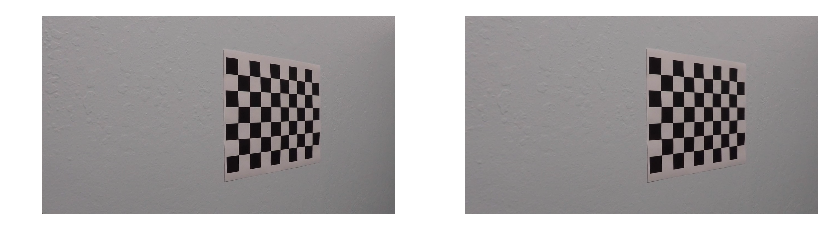

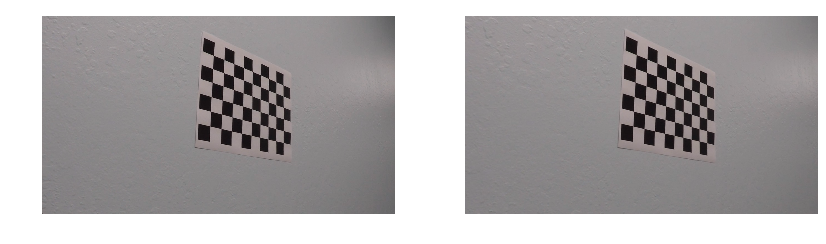

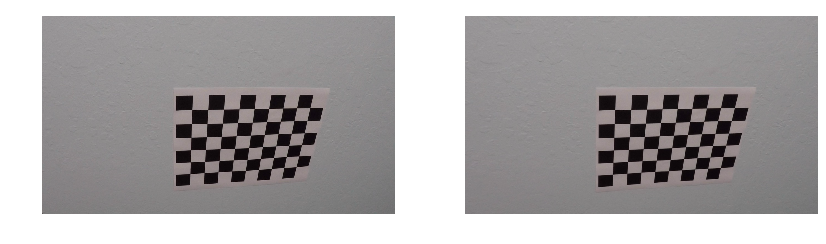

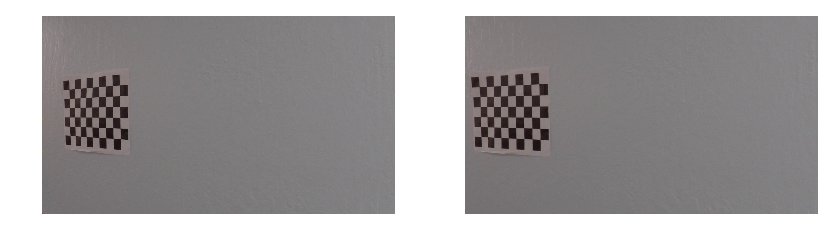

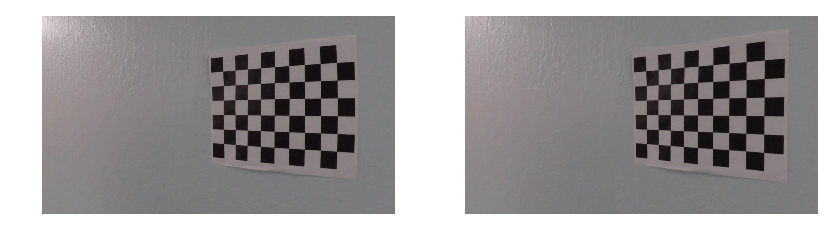

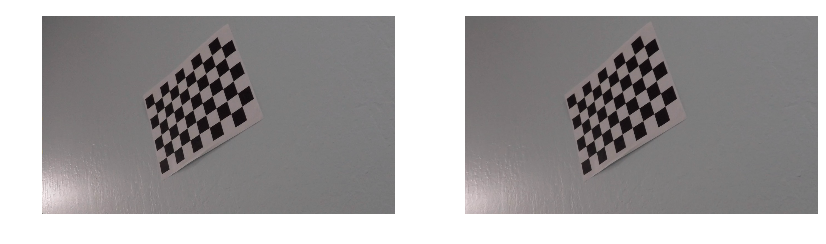

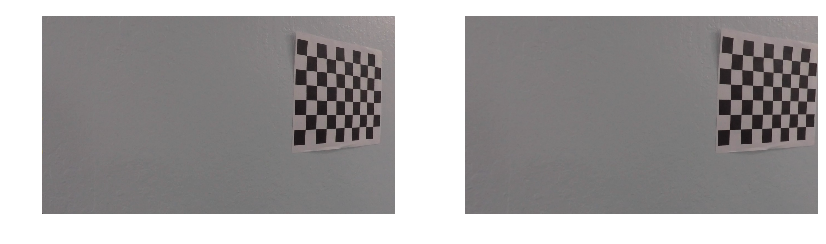

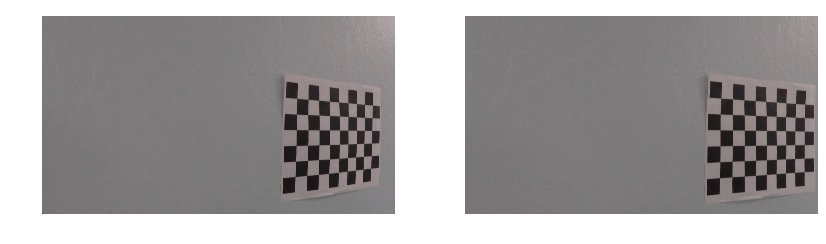

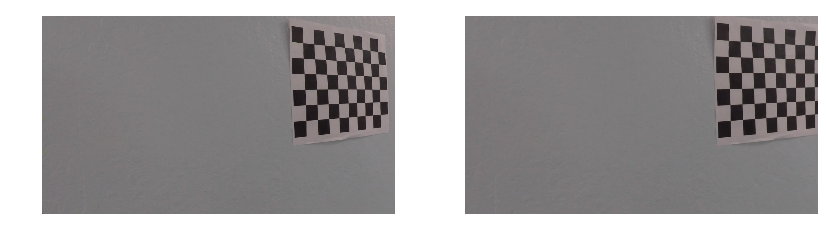

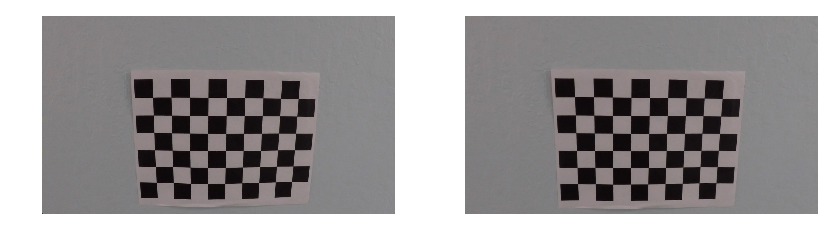

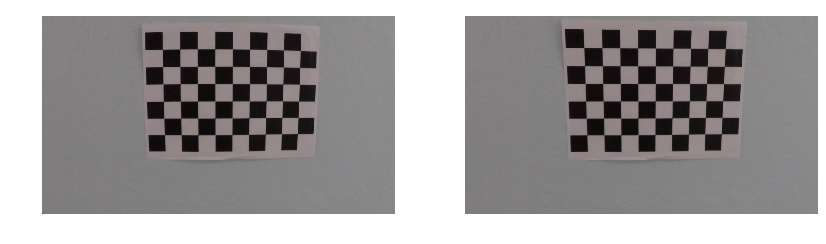

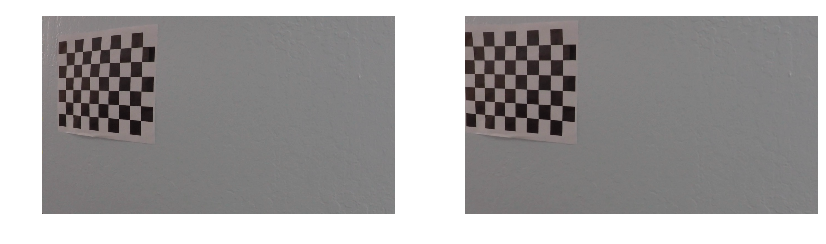

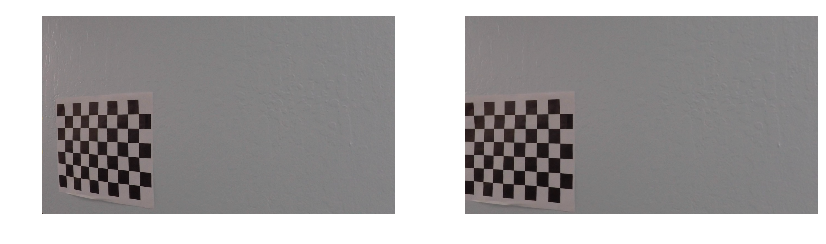

In [6]:
for i in range(20):
    
    img = cv2.imread('camera_cal/calibration'+ str(i+1) + '.jpg')
    img_size = (img.shape[1], img.shape[0])
    
    # Undistor image
    undist = cv2.undistort(img, mtx, dist, None, mtx)

    # Display
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    plt.savefig("examples_images_undistorted/image" + str(i+1) + "_original.jpg")
    plt.subplot(1,2,2)
    plt.imshow(undist)
    plt.axis('off')
    plt.savefig("examples_images_undistorted/image" + str(i+1) + "_undistorted.jpg")
    plt.show()
    